In [1]:
import numpy as np
import pandas as pd
import folium
import folium.plugins

# 11월 21일

## 기본 지도 그리기

In [2]:
folium.Map(scrollWheelZoom = False)

In [15]:
folium.Map(
    scrollWheelZoom = False,
    location = [35.8468, 127.1294],
    zoom_start = 20 #숫자가 높을 수록 좀 당겨지는 듯
)

#### tiles option

tiles = "OpenStreetMap"\
tiles = "Stamen Terrain" , "Stamen Toner", "Stamen Watercolor"\
tiles = "CartoDB positron", "CartoDB dark_matter"

In [18]:
folium.Map(
    scrollWheelZoom = False,
    location = [35.8468, 127.1294], #분수대
    zoom_start = 15,
    tiles = "CartoDB positron"
)

## 기본 지도 위에 마커 추가

In [27]:
m = folium.Map(
    scrollWheelZoom=False,
    location = [35.8468,127.1294], # 분수대 
    zoom_start=14,
    tiles="CartoDB positron"
)

jbnu = folium.Marker(
    location = [35.8475,127.1305],
    popup = "i hate study",
    tooltip = "jbnu"
)

home = folium.Marker(
    location = [35.8368, 127.1118],
    popup = "Home",
    tooltip = "클릭해보세요"
)

jbnu.add_to(m)
home.add_to(m)
# 35.8475,127.1305 # 자연대본관 
# 35.8468,127.1294 # 분수대 
m

#### 아이콘 변경

In [34]:
m = folium.Map(
    scrollWheelZoom=False,
    location = [35.8468,127.1294], # 분수대 
    zoom_start=14,
    tiles="CartoDB positron"
)

jbnu = folium.Marker(
    location = [35.8475,127.1305],
    popup = "i hate study",
    tooltip = "jbnu",
    icon=folium.Icon(color='red',icon='university',prefix='fa')
)

home = folium.Marker(
    location = [35.8368, 127.1118],
    popup = "Home",
    tooltip = "클릭해보세요"
)

jbnu.add_to(m)
home.add_to(m)
# 35.8475,127.1305 # 자연대본관 
# 35.8468,127.1294 # 분수대 
m

#### 팝업 html로 넣기

In [35]:
m = folium.Map(
    scrollWheelZoom=False,
    location = [35.8468,127.1294], # 분수대 
    zoom_start=14,
    tiles="CartoDB positron"
)

jbnu = folium.Marker(
    location = [35.8475,127.1305],
    popup = "<h2> Jangyoonseo </h2><br>",
    tooltip = "jbnu",
    icon=folium.Icon(color='red',icon='university',prefix='fa')
)

home = folium.Marker(
    location = [35.8368, 127.1118],
    popup = "Home",
    tooltip = "클릭해보세요"
)

jbnu.add_to(m)
home.add_to(m)
# 35.8475,127.1305 # 자연대본관 
# 35.8468,127.1294 # 분수대 
m

#### 팝업에 html로 데이터 프레임 넣기

In [39]:
_df = pd.DataFrame({'year':[2019,2020,2021,2022], 'students':[35,30,33,26]})
_df

year  students
0  2019        35
1  2020        30
2  2021        33
3  2022        26

In [40]:
m = folium.Map(
    scrollWheelZoom=False,
    location = [35.8468,127.1294], # 분수대 
    zoom_start=14,
    tiles="CartoDB positron"
)

jbnu = folium.Marker(
    location = [35.8475,127.1305],
    popup = "<h2> Jangyoonseo </h2><br> " + _df.to_html(),
    tooltip = "jbnu",
    icon=folium.Icon(color='red',icon='university',prefix='fa')
)

home = folium.Marker(
    location = [35.8368, 127.1118],
    popup = "Home",
    tooltip = "클릭해보세요"
)

jbnu.add_to(m)
home.add_to(m)
# 35.8475,127.1305 # 자연대본관 
# 35.8468,127.1294 # 분수대 
m

#### 팝업에 html로 전환된 데이터 프레임 추가 , 팝업시 크기 조절기능 삽입

In [42]:
_iframe = folium.IFrame('<h2> JBNU </h2><br>'+_df.to_html(),width=150,height=200)
_popup = folium.Popup(_iframe)

In [47]:
m = folium.Map(
    scrollWheelZoom=False,
    location = [35.8468,127.1294], # 분수대 
    zoom_start=14,
    tiles="CartoDB positron"
)

jbnu = folium.Marker(
    location = [35.8475,127.1305],
    popup = _popup ,
    tooltip = "Jbnu",
    icon=folium.Icon(color='red',icon='university',prefix='fa')
)

home = folium.Marker(
    location = [35.8368, 127.1118],
    popup = "Home",
    tooltip = "클릭해보세요"
)

jbnu.add_to(m)
home.add_to(m)
# 35.8475,127.1305 # 자연대본관 
# 35.8468,127.1294 # 분수대 
m

In [48]:
import matplotlib.pyplot as plt

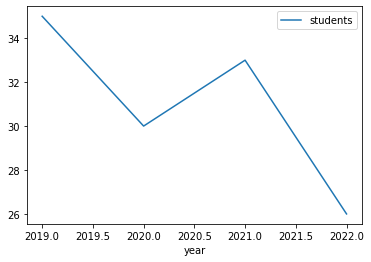

In [68]:
_df.plot.line(x='year', y= 'students')
fig = plt.gcf()

In [69]:
fig.savefig('test.png')

In [64]:
import base64

In [70]:
_encoded = base64.b64encode(open('test.png','rb').read())
_myhtml = '<img src="data:image/png;base64,{}">'.format
_iframe = folium.IFrame(_myhtml(_encoded.decode('UTF-8')),width=400,height=300)
_popup = folium.Popup(_iframe)

In [71]:
m = folium.Map(
    scrollWheelZoom=False,
    location = [35.8475,127.1305], # 자연대본관  
    zoom_start=14,
    tiles="CartoDB positron"
)
jbnu = folium.Marker(
    location = [35.8475,127.1305], # 자연대본관  
    icon=folium.Icon(color='red',icon='university',prefix='fa'),
    popup = _popup
)
home = folium.Marker(
    location = [35.8368, 127.1118], # 집 
    popup = "<h5> HOME </h5><br>",
    tooltip = "클릭해주세요"
)
jbnu.add_to(m)
home.add_to(m)
m

### folium.CircleMarker()

#### circle Marker

In [73]:
m = folium.Map(
    scrollWheelZoom=False,
    location = [35.8475,127.1305], # 자연대본관  
    zoom_start=14,
    tiles="CartoDB positron"
)
jbnu = folium.CircleMarker(
    location = [35.8475,127.1305], 
    popup = "JBNU"
)
jbnu.add_to(m)
m

#### circle marker의 색상 및 크기 변경

In [76]:
m = folium.Map(
    scrollWheelZoom=False,
    location = [35.8475,127.1305], # 자연대본관  
    zoom_start=14,
    tiles="CartoDB positron"
)
jbnu = folium.CircleMarker(
    location = [35.8475,127.1305], 
    popup = "JBNU",
    radius = 20,
    color='red'
)
jbnu.add_to(m)
m

#### circle marker 테두리 삭제 및 fill

In [78]:
m = folium.Map(
    scrollWheelZoom=False,
    location = [35.8475,127.1305], # 자연대본관  
    zoom_start=14,
    tiles="CartoDB positron"
)
jbnu = folium.CircleMarker(
    location = [35.8475,127.1305], 
    popup = "JBNU",
    radius = 20,
    color=None,
    fill=True,
    fill_color='blue'
)
jbnu.add_to(m)
m

## folium : heatmap

#### folium.plugins.HeatMap()

In [81]:
np.random.seed(43052)
data = np.random.multivariate_normal(mean=[28,77],cov=[[5,0],[0,5]],size=30)
data

array([[28.85735428, 79.42428788],
       [30.55532984, 77.68847119],
       [28.53170889, 77.79593099],
       [24.28125031, 73.90802517],
       [23.69144396, 73.67671933],
       [28.01548519, 76.92198975],
       [27.2317469 , 78.58527488],
       [24.53184497, 80.00897792],
       [27.87356664, 75.1436758 ],
       [24.72650472, 76.20709939],
       [27.23438418, 78.69678208],
       [32.97480623, 73.16060104],
       [31.55348967, 77.83018414],
       [29.72735877, 76.03486715],
       [29.72105093, 79.05284743],
       [26.98894987, 77.71250511],
       [29.82617838, 76.63020934],
       [30.53293541, 77.4658718 ],
       [24.23985514, 76.32658052],
       [29.39532886, 76.33151468],
       [27.43952815, 74.4129713 ],
       [25.10890152, 75.58970704],
       [26.43701446, 79.83294912],
       [29.88171925, 73.72508327],
       [27.62328548, 79.88574109],
       [28.81568439, 76.77756838],
       [26.14680892, 75.5387959 ],
       [28.15755534, 71.48729756],
       [31.11434115,

In [83]:
m= folium.Map(
    scrollWheelZoom = False,
    location = [28,77],
    zoom_start = 5
)
folium.plugins.HeatMap(data).add_to(m)
m

### folium : heatmap animation

#### folium.plugins.HeatMapWithTime()

In [86]:
np.random.seed(43052)
data1 = np.random.multivariate_normal(mean=[28,77],cov=[[5,0],[0,5]],size=20)
data2 = np.random.multivariate_normal(mean=[25,80],cov=[[5,0],[0,5]],size=20)
data3 = np.random.multivariate_normal(mean=[31,70],cov=[[5,0],[0,5]],size=20)
data = np.array([data1,data2,data3])

In [87]:
m = folium.Map(
    scrollWheelZoom=False,
    location = [28,77],
    zoom_start=5
)
folium.plugins.HeatMapWithTime(
    data.tolist(),
    index=['t1','t2','t3'], # time_index 
    radius=15,
).add_to(m)
m

### Earthquakes

#### Step1 : pandas 정리

In [93]:
df=pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/earthquakes-23k.csv')
df

Date  Latitude  Longitude  Magnitude
0      01/02/1965   19.2460   145.6160        6.0
1      01/04/1965    1.8630   127.3520        5.8
2      01/05/1965  -20.5790  -173.9720        6.2
3      01/08/1965  -59.0760   -23.5570        5.8
4      01/09/1965   11.9380   126.4270        5.8
...           ...       ...        ...        ...
23407  12/28/2016   38.3917  -118.8941        5.6
23408  12/28/2016   38.3777  -118.8957        5.5
23409  12/28/2016   36.9179   140.4262        5.9
23410  12/29/2016   -9.0283   118.6639        6.3
23411  12/30/2016   37.3973   141.4103        5.5

[23412 rows x 4 columns]

In [125]:
lst =[ 
    df.assign(Year = list(map(lambda x: x.split('/')[-1], df.Date)))\
    .assign(Year = lambda df: list(map(lambda x: x.split('-')[0] ,df.Year)))\
    .groupby('Year')\
    .pipe(list)[_year][1]\
    .loc[:,['Latitude','Longitude']]\
    .pipe(np.array).tolist()
    
    for _year in range(2016-1965+1) # 현장강의에서 실수한것 수정
]

In [124]:
m=folium.Map(scrollWheelZoom=False)
folium.plugins.HeatMapWithTime(
    lst,
    radius=5,
    index=list(range(1965,2017)) # 현장강의에서 실수한것 수정
).add_to(m)
m

#### 구조를 알아 둘 것

In [128]:
__lst = [
    'jangyoonse'*i
    
    for i in range(10)
]

# 11월 23일

In [1]:
import pandas as pd
import plotly.express as px

#### 기본 그리기 1

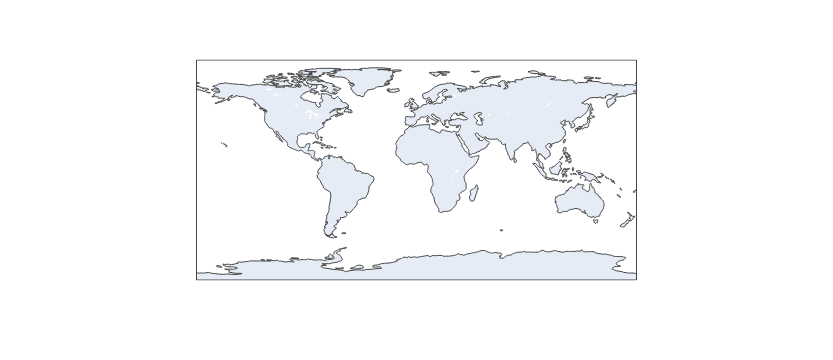

In [2]:
px.scatter_geo()

#### 기본 그리기 2

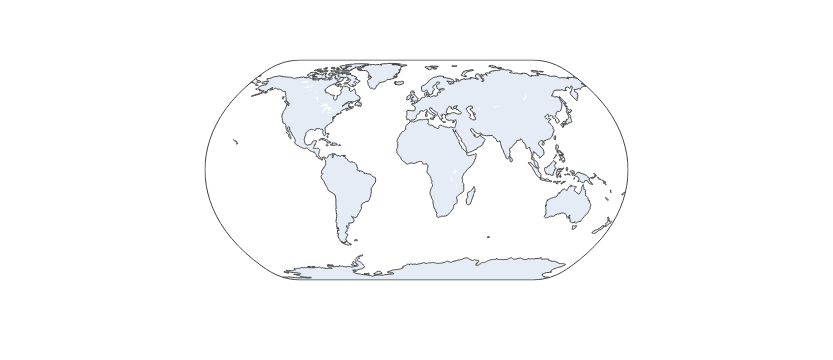

In [5]:
px.scatter_geo(projection= 'natural earth')

### 세계지도 + 버블

#### 좌표에 점을 찍어보자

In [10]:
df = pd.DataFrame({'lat':[0,38],'lon':[0,127],'size':[5,20]})
df

lat  lon  size
0    0    0     5
1   38  127    20

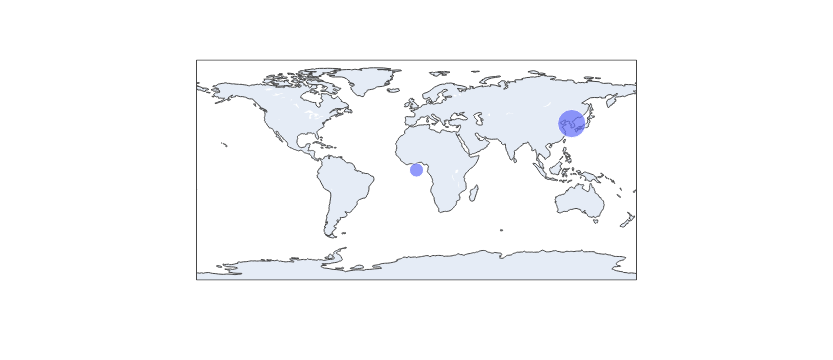

In [13]:
px.scatter_geo(df, lat= 'lat', lon= 'lon', size= 'size')

#### 좌표에 점찍기 2

In [15]:
df= pd.DataFrame({'iso_alpha':['KOR','JPN'],'size':[10,2] })
df

iso_alpha  size
0       KOR    10
1       JPN     2

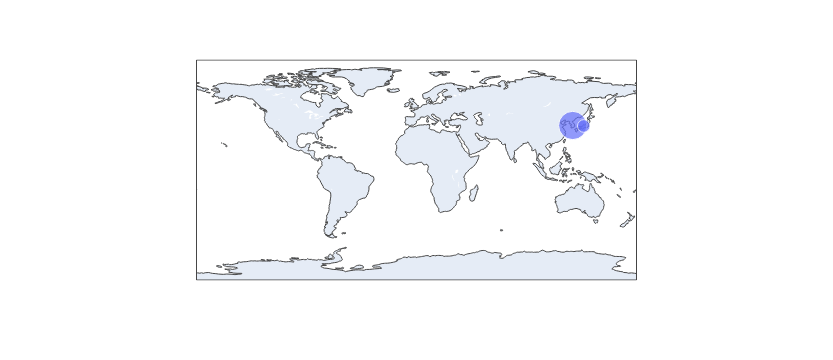

In [16]:
px.scatter_geo(df, locations = 'iso_alpha',size= 'size')

## Gapminder data 시각화

In [18]:
df = px.data.gapminder()
df

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0     Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1     Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2     Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3     Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4     Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   
...           ...       ...   ...      ...       ...         ...       ...   
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306       ZWE   
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786       ZWE   
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960       ZWE   
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623       ZWE   
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298       ZWE   

      iso_num  
0           4  
1           4  
2           4  
3           4  
4           4  
...       ...  
1699      716  
1700      716  
1701      716  
1702      716  
1703      716  

[1704 rows x 8 columns]

`-` 2007년 만 추출

In [20]:
df.query('year == 2007')

country continent  year  lifeExp       pop     gdpPercap  \
11           Afghanistan      Asia  2007   43.828  31889923    974.580338   
23               Albania    Europe  2007   76.423   3600523   5937.029526   
35               Algeria    Africa  2007   72.301  33333216   6223.367465   
47                Angola    Africa  2007   42.731  12420476   4797.231267   
59             Argentina  Americas  2007   75.320  40301927  12779.379640   
...                  ...       ...   ...      ...       ...           ...   
1655             Vietnam      Asia  2007   74.249  85262356   2441.576404   
1667  West Bank and Gaza      Asia  2007   73.422   4018332   3025.349798   
1679         Yemen, Rep.      Asia  2007   62.698  22211743   2280.769906   
1691              Zambia    Africa  2007   42.384  11746035   1271.211593   
1703            Zimbabwe    Africa  2007   43.487  12311143    469.709298   

     iso_alpha  iso_num  
11         AFG        4  
23         ALB        8  
35         DZA       12  
47         AGO       24  
59         ARG       32  
...        ...      ...  
1655       VNM      704  
1667       PSE      275  
1679       YEM      887  
1691       ZMB      894  
1703       ZWE      716  

[142 rows x 8 columns]

#### 시각화 예시1(x,y) = (lon,lat) = locations

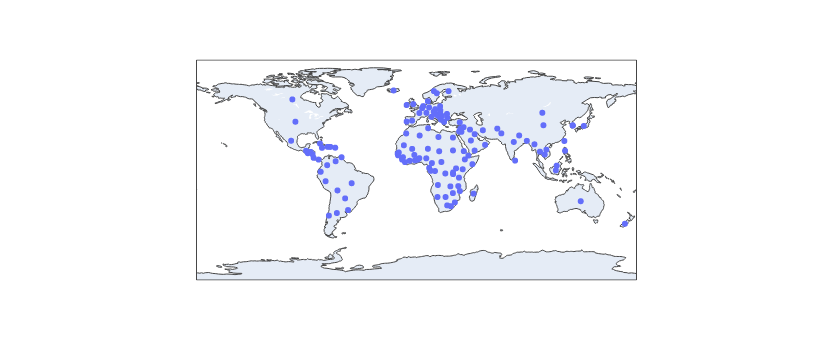

In [22]:
px.scatter_geo(
    data_frame = df.query('year == 2007'),
    locations = 'iso_alpha'
)

#### 시각화 예시 2: (x,y) = (lon,lat) = locations , size = pop , color =continent

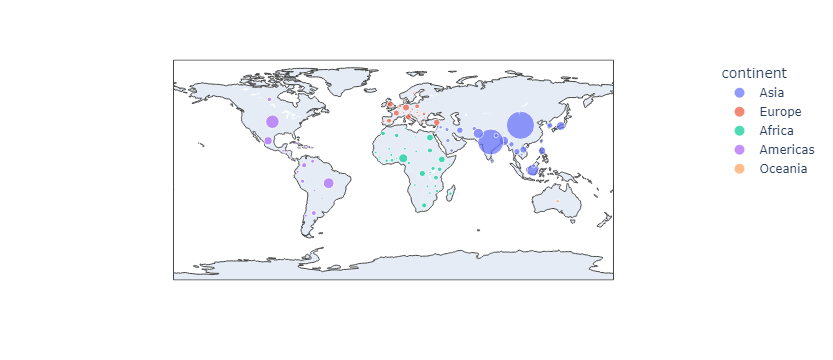

In [24]:
px.scatter_geo(
    data_frame = df.query('year == 2007'),
    locations = 'iso_alpha',
    size = 'pop',
    color = 'continent'
)

### `scatter_geo` + animation

#### 시각화 예시

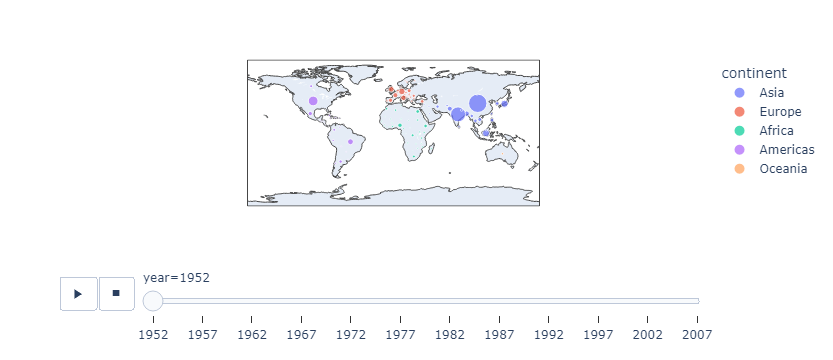

In [28]:
px.scatter_geo(
    data_frame = df,
    locations = 'iso_alpha',
    size = 'pop',
    color = 'continent',
    animation_frame = 'year'
)

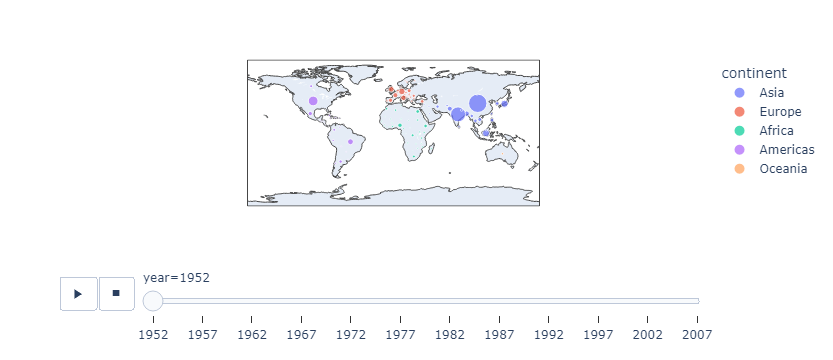

In [30]:
px.scatter_geo(
    data_frame = df,
    locations = 'iso_alpha',
    size = 'pop',
    color = 'continent',
    animation_frame = 'year'
)

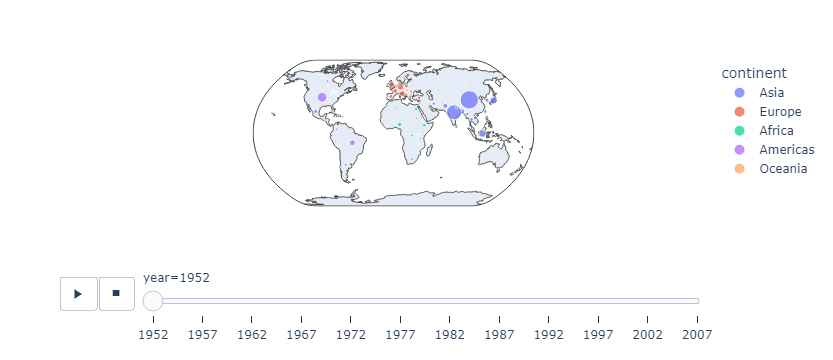

In [31]:
px.scatter_geo(
    data_frame = df,
    projection = 'natural earth',
    locations = 'iso_alpha',
    size = 'pop',
    color = 'continent',
    animation_frame = 'year'
)